<a href="https://colab.research.google.com/github/p72/mypython/blob/master/%E6%A0%AA%E4%BE%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fbprophet import Prophet
import pandas as pd

data = pd.DataFrame()
file_name = '^N225-2.csv'
data2 = pd.read_csv(file_name, skiprows=1,header=None, names=['ds','Open','High','Low','Close','y','Volume'])

In [2]:
data = data.append(data2)
print(data)

              ds          Open  ...             y    Volume
0     2015-03-25  19745.750000  ...  19746.199219  145000.0
1     2015-03-26  19605.599609  ...  19471.119141  154800.0
2     2015-03-27  19374.720703  ...  19285.630859  178300.0
3     2015-03-30  19295.210938  ...  19411.400391  136300.0
4     2015-03-31  19592.429688  ...  19206.990234  151600.0
...          ...           ...  ...           ...       ...
1238  2020-03-18  17154.080078  ...  16726.550781  177200.0
1239  2020-03-19  16995.769531  ...  16552.830078  198900.0
1240  2020-03-23  16570.570313  ...  16887.779297  170300.0
1241  2020-03-24  17206.880859  ...  18092.349609  147300.0
1242  2020-03-25  18446.800781  ...  19546.630859       0.0

[1243 rows x 7 columns]


In [3]:
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future_data = model.make_future_dataframe(periods=250, freq = 'd')
future_data = future_data[future_data['ds'].dt.weekday < 5]

forecast_data = model.predict(future_data)

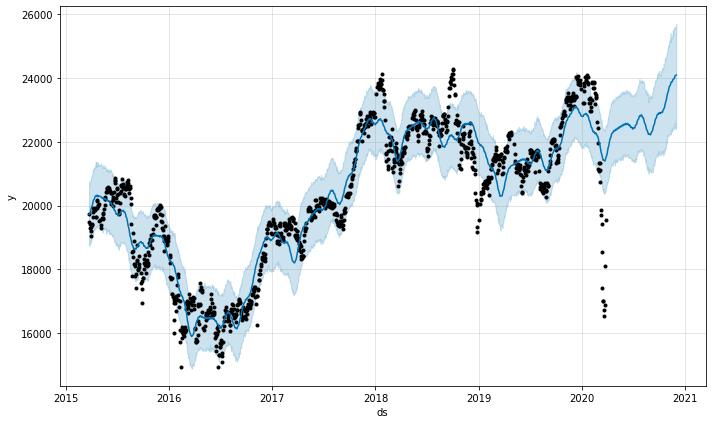

In [5]:
fig = model.plot(forecast_data)
